In [14]:
import numpy as np
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [15]:
np.random.seed(180205)

cov_mat = np.array([[1, 0.8], [0.8, 1]])
mean_vec = np.array([0, 0])
sample_n = 2000 #sample size

X_draw = np.random.multivariate_normal(mean_vec, cov_mat, sample_n)

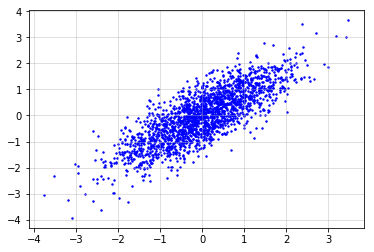

In [16]:
X_draw = X_draw - np.mean(X_draw, axis = 0)

plt.scatter(X_draw[:, 0], X_draw[:, 1], s = 2, c = 'blue')
#plt.axis('equal')
plt.grid(alpha = 0.5)
plt.show()

In [17]:
b = np.array([[1, 1]]).T
e = np.random.randn(sample_n, 1)

y = np.dot(X_draw, b) + e

In [18]:
import statsmodels.api as sm

model = sm.OLS(y, X_draw)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     3615.
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:12:20   Log-Likelihood:                -2845.3
No. Observations:                2000   AIC:                             5695.
Df Residuals:                    1998   BIC:                             5706.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.9793      0.038     25.895      0.0

In [19]:
U, s, V = np.linalg.svd(X_draw, full_matrices=True)
U.shape, s.shape, V.shape 

((2000, 2000), (2,), (2, 2))

In [20]:
V

array([[ 0.7069261 ,  0.70728741],
       [ 0.70728741, -0.7069261 ]])

In [21]:
S = np.zeros((sample_n, 2))
S[:2, :2] = np.diag(s)

mat_C = U @ S @ V # @ = matrix multiplication operator
mat_C.shape

(2000, 2)

In [22]:
mat_C.view()

array([[-0.58423655,  0.17253359],
       [ 0.70854001,  0.65626078],
       [ 1.44859906,  1.84034171],
       ..., 
       [-0.80526546, -1.30774406],
       [ 0.0752482 ,  1.56600821],
       [-0.24105479, -0.34734535]])

In [23]:
X_draw.view()

array([[-0.58423655,  0.17253359],
       [ 0.70854001,  0.65626078],
       [ 1.44859906,  1.84034171],
       ..., 
       [-0.80526546, -1.30774406],
       [ 0.0752482 ,  1.56600821],
       [-0.24105479, -0.34734535]])

In [24]:
Z_mat = np.dot(X_draw, V.T)
Z_1 = Z_mat[:, 0:1]

In [25]:
model2 = sm.OLS(y, Z_1)
results2 = model2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     7233.
Date:                Mon, 05 Feb 2018   Prob (F-statistic):               0.00
Time:                        17:12:20   Log-Likelihood:                -2845.4
No. Observations:                2000   AIC:                             5693.
Df Residuals:                    1999   BIC:                             5698.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.4126      0.017     85.047      0.0

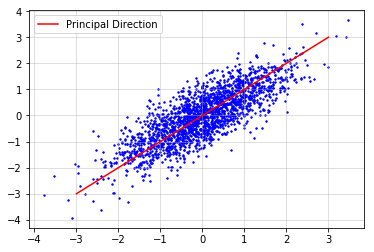

In [26]:
plt.scatter(X_draw[:, 0], X_draw[:, 1], s = 2, c = 'blue')
#plt.axis('equal')
plt.grid(alpha = 0.5)

x_base = np.linspace(-3, 3, 10**3)
plt.plot(x_base, (V[0, 1]/V[0, 0]) * x_base, c = 'red')
plt.legend(['Principal Direction'])
plt.show()

In [27]:
s

array([ 60.44589527,  19.75820001])